In [9]:
#Use Case:
#Identify underserved districts or farmer groups and help policymakers target credit distribution more equitably.


In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [11]:
# 3. Load Dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\Agriculture.csv")
df.head()


,srcStateName,srcDistrictName,srcYear,Holding Size Category (in Hectares),Estimated Operational Holdings availing Institutional Credit,Operational Holdings availing Credit from Primary Agricultural Credit Society,Operational Holdings availing Credit from Primary land development bank or State Land Development Bank,Operational Holdings availing Credit from Regional rural bank,Operational Holdings availing Credit from Commercial bank,Short Term loans from primary agricultural credit society,...,Medium Term loans from Regional rural bank,Long Term loans from Regional rural bank,Short Term loans from Commercial bank,Medium Term loans from Commercial bank,Long Term loans from Commercial bank,Short Term Loan Value of fertilizer,Short Term Loan Value of other inputs,Short Term Loan given in cash,YearCode,Year
0,Andhra Pradesh,Srikakulam,2016-17,4.0 - 9.99,2768,840,25,1137,1038,1289.12,...,0.00,0.00,1366.96,57.08,0.00,653.09,177.42,3355.87,2016,"Calendar Year (Jan - Dec), 2016"
1,Andhra Pradesh,Srikakulam,2016-17,10 and Above,298,75,0,187,37,238.72,...,0.00,0.00,7.46,0.00,0.00,33.57,0.00,958.61,2016,"Calendar Year (Jan - Dec), 2016"
2,Andhra Pradesh,Vizianagaram,2016-17,Below 1.0,154666,52125,0,49562,60670,11715.33,...,153.81,0.00,13398.72,3512.04,2871.15,469.98,324.71,36692.66,2016,"Calendar Year (Jan - Dec), 2016"
3,Andhra Pradesh,Vizianagaram,2016-17,1.0 - 1.99,40812,17318,269,11143,14231,7089.74,...,161.10,0.00,7482.06,1092.80,229.57,529.62,318.17,19516.63,2016,"Calendar Year (Jan - Dec), 2016"
4,Andhra Pradesh,Vizianagaram,2016-17,2.0 - 3.99,17401,6914,0,4687,7089,4979.86,...,251.94,58.59,4749.89,609.92,228.50,386.40,230.84,12790.78,2016,"Calendar Year (Jan - Dec), 2016"


In [12]:
# 4. Data Overview
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 26 columns):
 #   Column                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                  --------------  -----  
 0   srcStateName                                                                                            3285 non-null   object 
 1   srcDistrictName                                                                                         3285 non-null   object 
 2   srcYear                                                                                                 3285 non-null   object 
 3   Holding Size Category (in Hectares)                                                                     3285 non-null   object 
 4   Estimated Operational Holdings availing Institutional Credit                              

srcStateName                                                                                              0
srcDistrictName                                                                                           0
srcYear                                                                                                   0
Holding Size Category (in Hectares)                                                                       0
Estimated Operational Holdings availing Institutional Credit                                              0
Operational Holdings availing Credit from Primary Agricultural Credit Society                             0
Operational Holdings availing Credit from Primary land development bank or State Land Development Bank    0
Operational Holdings availing Credit from Regional rural bank                                             0
Operational Holdings availing Credit from Commercial bank                                                 0
Short Term loans from primar

In [13]:
# Data Cleaning & Preprocessing
# Convert columns to appropriate data types
df['srcYear'] = pd.to_datetime(df['srcYear'], errors='coerce').dt.year
df['Holding Size Category (in Hectares)'] = df['Holding Size Category (in Hectares)'].str.strip()

# Check for duplicates
df.duplicated().sum()


0

In [15]:
import matplotlib.ticker as ticker

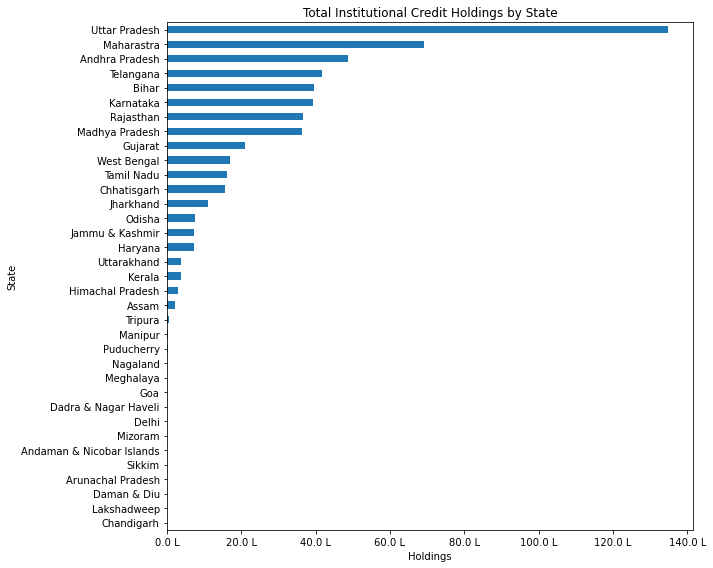

In [16]:
#  Exploratory Data Analysis (EDA)

# Distribution of Credit Access by State
state_credit = df.groupby('srcStateName')['Estimated Operational Holdings availing Institutional Credit'].sum().sort_values()
plt.figure(figsize=(10, 8))
state_credit.plot(kind='barh')
plt.title('Total Institutional Credit Holdings by State')
plt.xlabel('Holdings')
plt.ylabel('State')
# Format x-axis in Lakhs
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e5:.1f} L'))
plt.tight_layout()
plt.show()


In [17]:
#Let us do an analysis for Uttar Pradesh as it has taken the highest loan from institutional organisation

In [18]:
# Strip whitespace and normalize
df['srcStateName'] = df['srcStateName'].str.strip().str.lower()
df['srcDistrictName'] = df['srcDistrictName'].str.strip()
df['srcYear'] = pd.to_datetime(df['srcYear'], errors='coerce').dt.year # Taking only the year 


In [19]:
# Filter for UP
up_df = df[df['srcStateName'] == 'uttar pradesh']


C:\Users\Admin\AppData\Local\Temp\ipykernel_4320\4046671042.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_df['Total_Credit'] = up_df[credit_columns].sum(axis=1)


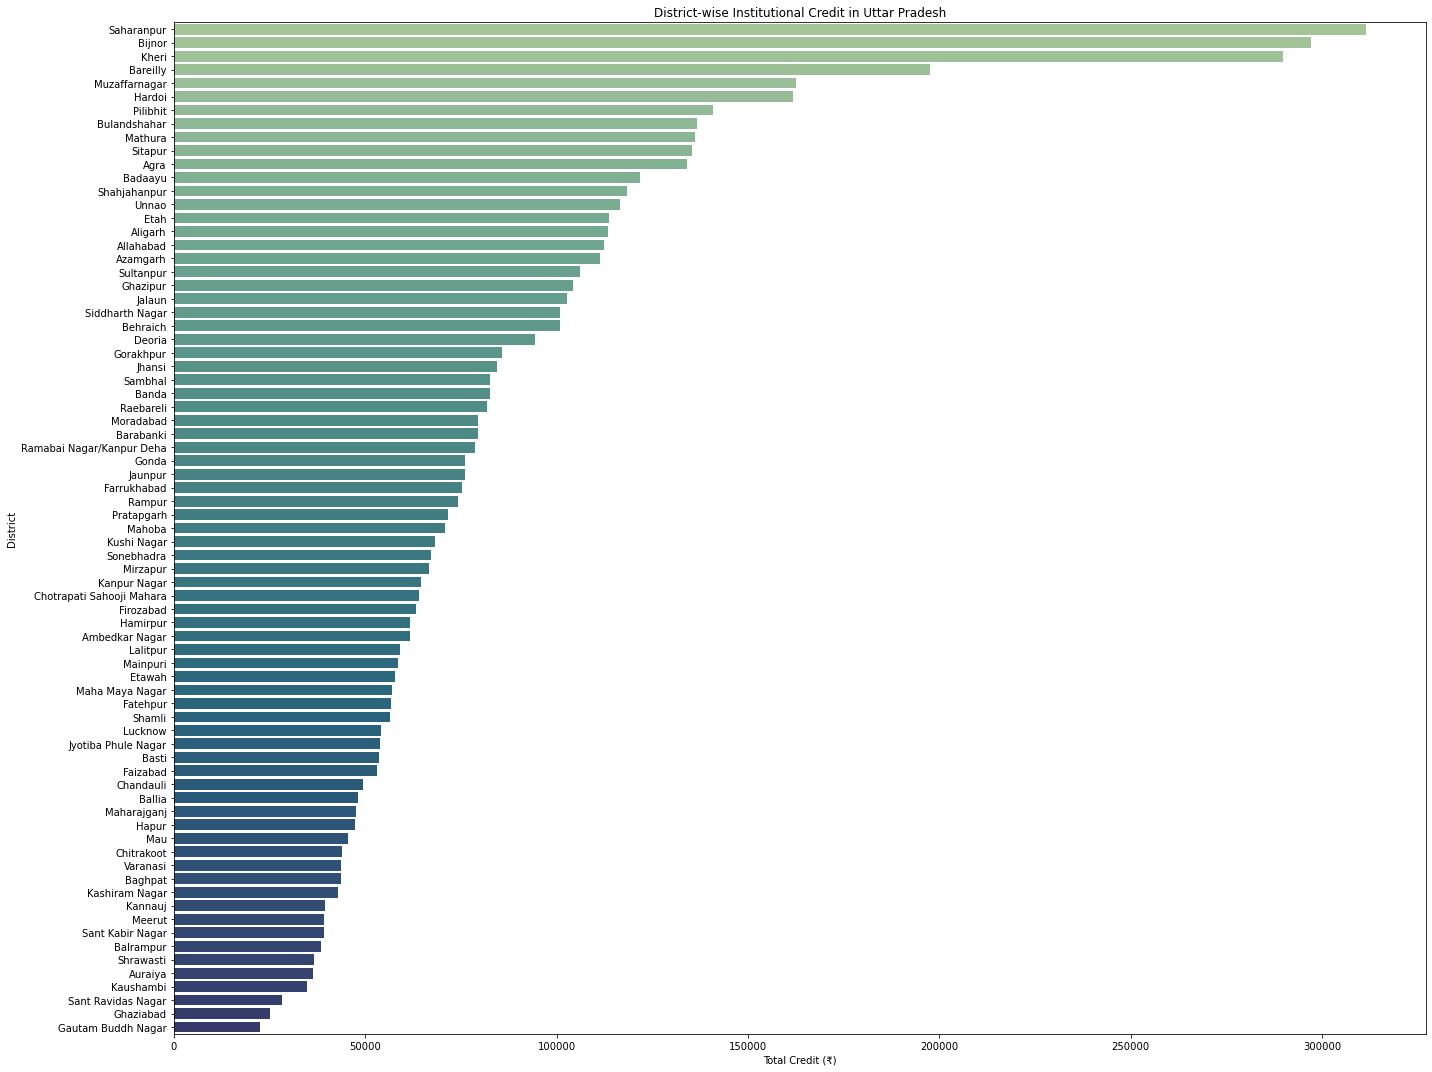

In [20]:
#District Wise Total Credit 
credit_columns = [
    'Short Term loans from primary agricultural credit society',
    'Medium Term loans from primary agricultural credit society',
    'Long Term loans from primary agricultural credit society',
    'Short Term loans from Primary Land Development Bank or State Land Development Bank (SLDB)',
    'Medium Term loans from Primary Land Development Bank or State Land Development Bank (SLDB)',
    'Long Term loans from Primary Land Development Bank or State Land Development Bank (SLDB)',
    'Short Term loans from Regional rural bank',
    'Medium Term loans from Regional rural bank',
    'Long Term loans from Regional rural bank',
    'Short Term loans from Commercial bank',
    'Medium Term loans from Commercial bank',
    'Long Term loans from Commercial bank'
]

# Total institutional credit per district
up_df['Total_Credit'] = up_df[credit_columns].sum(axis=1)

district_credit = up_df.groupby('srcDistrictName')['Total_Credit'].sum().sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.barplot(x=district_credit.values, y=district_credit.index, palette="crest")
plt.title("District-wise Institutional Credit in Uttar Pradesh")
plt.xlabel("Total Credit (₹)")
plt.ylabel("District")
plt.tight_layout()
plt.show()


In [21]:
#Year Wise Credit Trend (only one Year is being Identified here )

In [22]:
#Loan Type Breakdown by Source

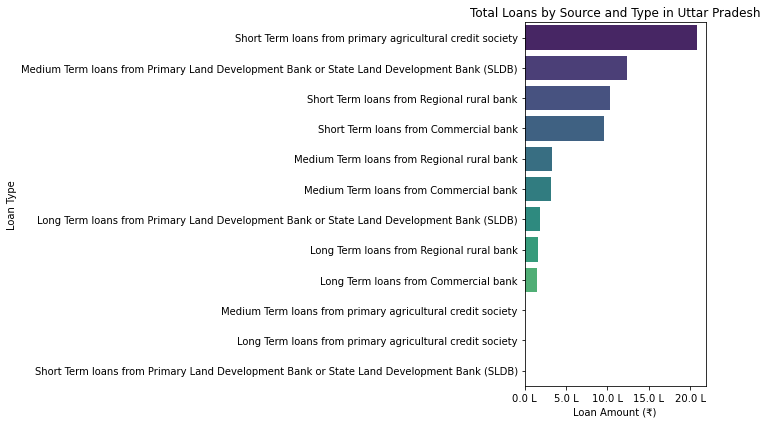

In [23]:
loan_type_totals = up_df[credit_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=loan_type_totals.values, y=loan_type_totals.index, palette='viridis')
plt.title("Total Loans by Source and Type in Uttar Pradesh")
plt.xlabel("Loan Amount (₹)")
plt.ylabel("Loan Type")
# Format x-axis in Lakhs
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e5:.1f} L'))

plt.tight_layout()
plt.show()


In [24]:
#Check for the loan amount which is coming, it is not proper 

In [25]:
#Short Term Loan Usage

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x=input_loans.values, y=input_loans.index, palette='flare')

# Title and labels
plt.title("Short-term Loan Allocation in Uttar Pradesh")
plt.xlabel("Amount (Lakhs ₹)")
plt.ylabel("Loan Purpose")

# Format x-axis in Lakhs
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e5:.1f} L'))

plt.tight_layout()
plt.show()



NameError: name 'input_loans' is not defined

<Figure size 432x360 with 0 Axes>

In [27]:
#Short Term Loan given in cash” has a value around ₹3,200,000
#This is 3.2 million rupees = ₹32 lakhs
#Fertilizer” is around ₹500,000
# ₹5 lakhs
#Other Inputs” is even less
#Maybe ₹1–2 lakhs



In [ ]:
#Insights 
#Farmers in Uttar Pradesh took ₹32 lakhs worth of short-term loans in cash.
#In contrast, only ₹5 lakhs for fertilizer and even less for other inputs.

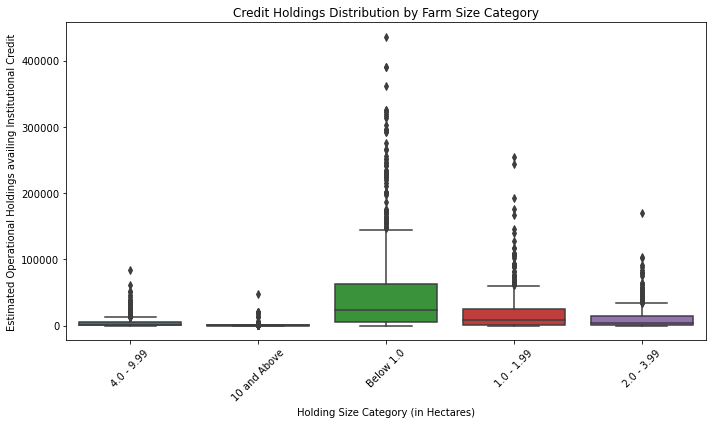

In [28]:
# Credit Access by Holding Size
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Holding Size Category (in Hectares)', y='Estimated Operational Holdings availing Institutional Credit')
plt.xticks(rotation=45)
plt.title('Credit Holdings Distribution by Farm Size Category')
plt.tight_layout()
plt.show()


In [29]:
#Credit Distribution By Farm Size

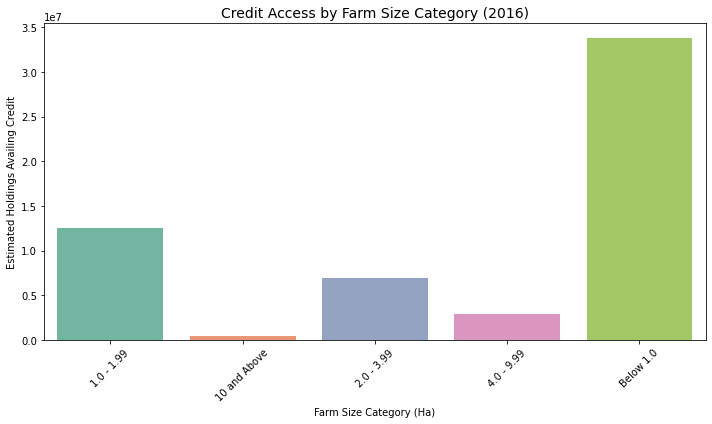

In [30]:
# Grouping by Holding Size Category
farm_size_summary = df.groupby('Holding Size Category (in Hectares)')[
    'Estimated Operational Holdings availing Institutional Credit'
].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Holding Size Category (in Hectares)', 
            y='Estimated Operational Holdings availing Institutional Credit', 
            data=farm_size_summary,
            palette='Set2')
plt.title('Credit Access by Farm Size Category (2016)', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Estimated Holdings Availing Credit')
plt.xlabel('Farm Size Category (Ha)')
plt.tight_layout()
plt.show()


In [31]:
#Credit Access by Lending Institution
#Compare which institutions are accessed most across all holdings.

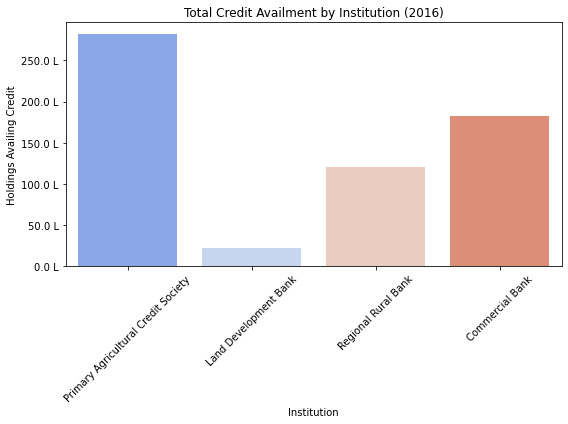

In [32]:
institutions = {
    'Primary Agricultural Credit Society': 'Operational Holdings availing Credit from Primary Agricultural Credit Society',
    'Land Development Bank': 'Operational Holdings availing Credit from Primary land development bank or State Land Development Bank',
    'Regional Rural Bank': 'Operational Holdings availing Credit from Regional rural bank',
    'Commercial Bank': 'Operational Holdings availing Credit from Commercial bank',
}

# Summarize all institutions
institution_summary = df[list(institutions.values())].sum().rename(index={v: k for k, v in institutions.items()}).reset_index()
institution_summary.columns = ['Institution', 'Total Operational Holdings']

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Institution', y='Total Operational Holdings', data=institution_summary, palette='coolwarm')
plt.title('Total Credit Availment by Institution (2016)')
plt.xticks(rotation=45)
plt.ylabel('Holdings Availing Credit')
# Format y-axis in Lakhs
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y / 1e5:.1f} L'))
plt.tight_layout()
plt.show()


In [33]:
#Goal: Compare the structure of credit types.

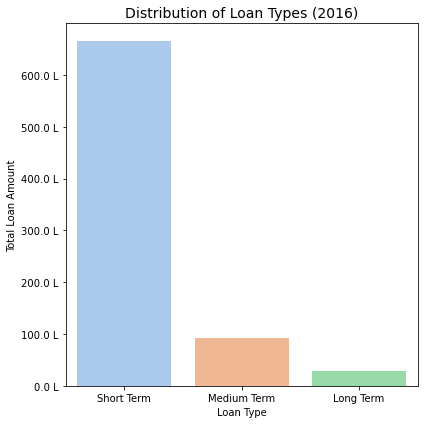

In [34]:
loan_types = {
    'Short Term': df.filter(like='Short Term').sum().sum(),
    'Medium Term': df.filter(like='Medium Term').sum().sum(),
    'Long Term': df.filter(like='Long Term').sum().sum(),
}

loan_type_df = pd.DataFrame(list(loan_types.items()), columns=['Loan Type', 'Total Amount'])

# Plot
plt.figure(figsize=(6,6))
sns.barplot(x='Loan Type', y='Total Amount', data=loan_type_df, palette='pastel')
plt.title('Distribution of Loan Types (2016)', fontsize=14)
plt.ylabel('Total Loan Amount')
# Format y-axis in Lakhs
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y / 1e5:.1f} L'))
plt.tight_layout()
plt.show()


In [35]:
 #Regional Comparison (Top 10 States by Credit)

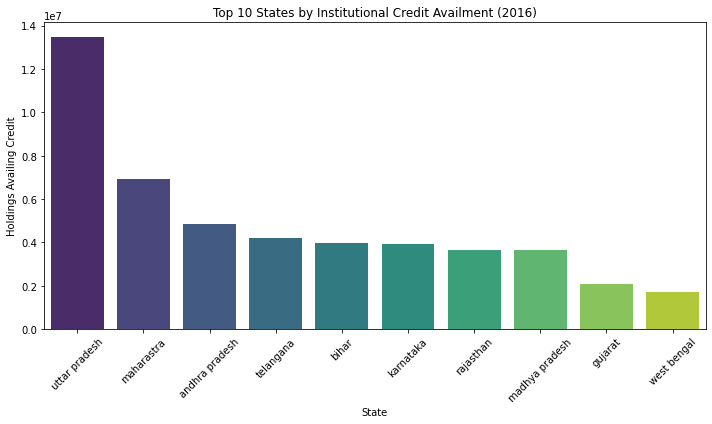

In [36]:
state_summary = df.groupby('srcStateName')[
    'Estimated Operational Holdings availing Institutional Credit'
].sum().sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='srcStateName', y='Estimated Operational Holdings availing Institutional Credit', 
            data=state_summary, palette='viridis')
plt.title('Top 10 States by Institutional Credit Availment (2016)')
plt.xticks(rotation=45)
plt.ylabel('Holdings Availing Credit')
plt.xlabel('State')
plt.tight_layout()
plt.show()


In [37]:
#Disparity Detection (Small vs. Large Farmers)

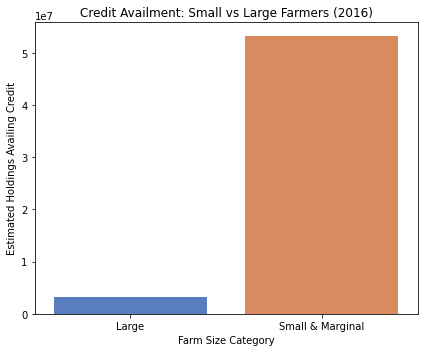

In [38]:
# Define smallholders as <= 2 hectares
df['Farm Size Category'] = df['Holding Size Category (in Hectares)'].apply(
    lambda x: 'Small & Marginal' if 'Below 1.0' in x or '1.0 - 1.99' in x or '2.0 - 3.99' in x else 'Large'
)

disparity_summary = df.groupby('Farm Size Category')[
    'Estimated Operational Holdings availing Institutional Credit'
].sum().reset_index()

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x='Farm Size Category', y='Estimated Operational Holdings availing Institutional Credit',
            data=disparity_summary, palette='muted')
plt.title('Credit Availment: Small vs Large Farmers (2016)')
plt.ylabel('Estimated Holdings Availing Credit')
plt.tight_layout()
plt.show()


In [39]:
#Doing a predictive modelling 
#Can we predict the estimated operational holdings availing institutional credit based on loan 
#disbursement patterns and regional features?"

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Filter for top state
top_state = df.groupby('srcStateName')['Estimated Operational Holdings availing Institutional Credit'].sum().idxmax()
model_df = df[df['srcStateName'] == top_state].copy()

# Step 2: Drop rows with missing target
model_df = model_df.dropna(subset=['Estimated Operational Holdings availing Institutional Credit'])

# Step 3: Define target and features
target = 'Estimated Operational Holdings availing Institutional Credit'
features = [
    'Short Term loans from primary agricultural credit society',
    'Medium Term loans from primary agricultural credit society',
    'Long Term loans from primary agricultural credit society',
    'Short Term loans from Primary Land Development Bank or State Land Development Bank (SLDB)',
    'Medium Term loans from Primary Land Development Bank or State Land Development Bank (SLDB)',
    'Long Term loans from Primary Land Development Bank or State Land Development Bank (SLDB)',
    'Short Term loans from Regional rural bank',
    'Medium Term loans from Regional rural bank',
    'Long Term loans from Regional rural bank',
    'Short Term loans from Commercial bank',
    'Medium Term loans from Commercial bank',
    'Long Term loans from Commercial bank',
    'Short Term Loan Value of fertilizer',
    'Short Term Loan Value of other inputs',
    'Short Term Loan given in cash',
    'srcYear',
    'Holding Size Category (in Hectares)',
    'srcDistrictName'
]

# Step 4: Separate data
X = model_df[features].copy()
y = model_df[target]

# Step 5: Handle missing data
X = X.fillna(0)

# Step 6: Preprocessing - encode categorical features
categorical_features = ['Holding Size Category (in Hectares)', 'srcDistrictName']
numeric_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Step 7: Model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Fit the model
pipeline.fit(X_train, y_train)

# Step 10: Predict and evaluate
y_pred = pipeline.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.9634004880405637
RMSE: 10639.464091224645


In [41]:
#Getting feature Importance 

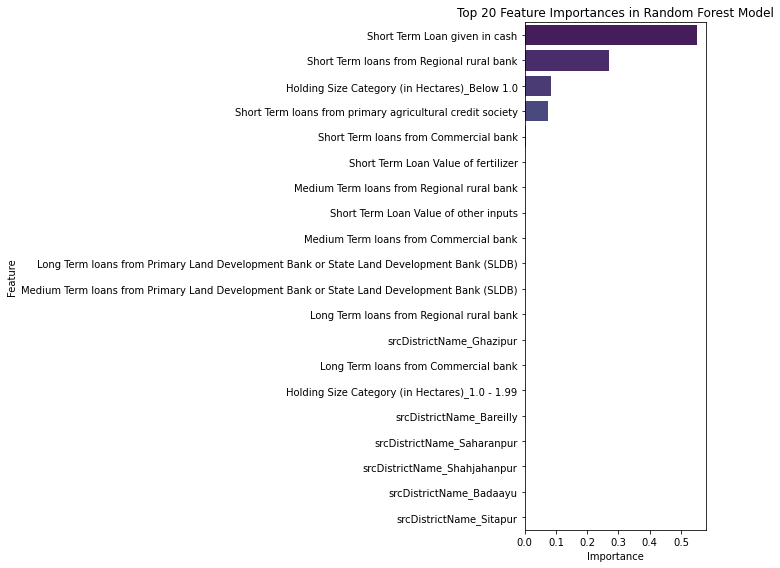

In [42]:
import matplotlib.pyplot as plt

# Step 1: Get feature names after preprocessing
# Get the transformed column names
numeric_cols = numeric_features
categorical_cols = list(pipeline.named_steps['preprocessor']
                        .named_transformers_['cat']
                        .get_feature_names_out(categorical_features))

# Combine all feature names
all_feature_names = numeric_cols + categorical_cols

# Step 2: Get feature importances from the model
importances = pipeline.named_steps['regressor'].feature_importances_

# Step 3: Create a DataFrame for easy handling
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 4: Plot top 20 important features
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importances in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [43]:
#Target Variable Distributed :


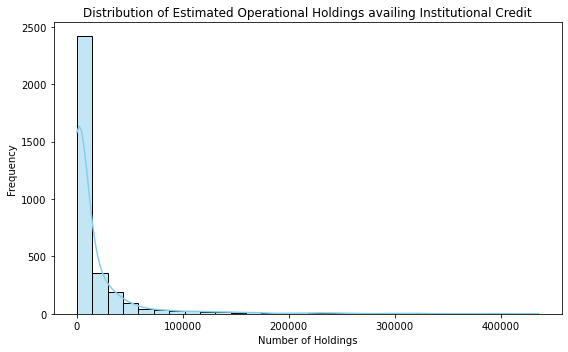

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Estimated Operational Holdings availing Institutional Credit'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Estimated Operational Holdings availing Institutional Credit")
plt.xlabel("Number of Holdings")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [45]:
#Let us assume there is a 5% increase in loan from 2016 to 2017 . Let us do a preidction on the estimated amount of loan that 
#will be taken up by respective states in 2017 using linear regression .

In [46]:
#List of columns related to loan.
loan_columns = [
    'Short Term loans from primary agricultural credit society',
    'Medium Term loans from Regional rural bank',
    'Long Term loans from Regional rural bank',
    'Short Term loans from Commercial bank',
    'Medium Term loans from Commercial bank',
    'Long Term loans from Commercial bank',
    'Short Term Loan Value of fertilizer',
    'Short Term Loan Value of other inputs',
    'Short Term Loan given in cash'
]

In [47]:
#Converting loan columns to numeric 
df[loan_columns] = df[loan_columns].apply(pd.to_numeric, errors='coerce')

In [48]:
## Group by state and sum all relevant loan columns
state_loan_summary = df.groupby('srcStateName')[loan_columns].sum()


In [49]:
# Compute total loan for 2016
state_loan_summary['Total Loan 2016'] = state_loan_summary.sum(axis=1)

In [50]:
# Estimate loan for 2017 with a 5% increase
state_loan_summary['Estimated Loan 2017'] = state_loan_summary['Total Loan 2016'] * 1.05


In [53]:
# Convert to whole numbers (integers)
state_loan_summary[['Total Loan 2016', 'Estimated Loan 2017']] = \
    state_loan_summary[['Total Loan 2016', 'Estimated Loan 2017']].round(0).astype(int)


In [61]:
# Sort by total loan in 2016 in descending order
sorted_df = state_loan_summary[['Total Loan 2016', 'Estimated Loan 2017']].sort_values(by='Total Loan 2016', ascending=False)

In [62]:
# Function to format values in Indian currency format
def format_inr(x):
    return f"₹{x:,}".replace(",", "_").replace("_", ",")


In [63]:
# Apply formatting
formatted_output = sorted_df.applymap(format_inr)

In [64]:
# Display result
print(formatted_output)

                          Total Loan 2016 Estimated Loan 2017
srcStateName                                                 
tamil nadu                    ₹10,411,755         ₹10,932,342
maharastra                    ₹10,121,334         ₹10,627,401
uttar pradesh                  ₹8,070,345          ₹8,473,862
rajasthan                      ₹7,437,342          ₹7,809,209
karnataka                      ₹5,136,409          ₹5,393,230
andhra pradesh                 ₹4,871,110          ₹5,114,666
madhya pradesh                 ₹4,362,185          ₹4,580,294
gujarat                        ₹4,133,535          ₹4,340,212
telangana                      ₹3,568,224          ₹3,746,635
haryana                        ₹3,418,881          ₹3,589,825
bihar                          ₹1,972,869          ₹2,071,513
chhatisgarh                    ₹1,041,573          ₹1,093,652
west bengal                    ₹1,041,092          ₹1,093,147
jammu & kashmir                  ₹861,416            ₹904,487
kerala  

In [65]:
#Save the sorted numeric values (not formatted) to CSV
sorted_df.to_csv("State_Loan_Estimates_2016_2017.csv")

In [66]:
import os
print("Saved to:", os.getcwd())


Saved to: C:\Users\Admin


# Quarter Wise Analysis 

In [ ]:
#Now we will do a quarter wise analysis , like we prediict Q3 = Q2+Q1, Q4= Q2+Q3 for each state .

In [67]:
#All Loan Columns 
loan_columns = [
    'Short Term loans from primary agricultural credit society',
    'Medium Term loans from Regional rural bank',
    'Long Term loans from Regional rural bank',
    'Short Term loans from Commercial bank',
    'Medium Term loans from Commercial bank',
    'Long Term loans from Commercial bank',
    'Short Term Loan Value of fertilizer',
    'Short Term Loan Value of other inputs',
    'Short Term Loan given in cash'
]

In [68]:
# Convert to numeric
df[loan_columns] = df[loan_columns].apply(pd.to_numeric, errors='coerce')


In [69]:
# Computing total loan for 2016 per state
state_loan_summary = df.groupby('srcStateName')[loan_columns].sum()
state_loan_summary['Total Loan 2016'] = state_loan_summary.sum(axis=1)


In [71]:
# Simulate quarterly split(we will put real case scenerios )
state_loan_summary['Q1'] = state_loan_summary['Total Loan 2016'] * 0.20
state_loan_summary['Q2'] = state_loan_summary['Total Loan 2016'] * 0.30
state_loan_summary['Q3'] = state_loan_summary['Total Loan 2016'] * 0.30
state_loan_summary['Q4'] = state_loan_summary['Total Loan 2016'] * 0.20

In [72]:
# --- Prediction Setup ---
# 1. Predict Q3 from Q1 + Q2
X_q3 = (state_loan_summary['Q1'] + state_loan_summary['Q2']).values.reshape(-1, 1)
y_q3 = state_loan_summary['Q3'].values

In [74]:
from sklearn.linear_model import LinearRegression
model_q3 = LinearRegression().fit(X_q3, y_q3)
state_loan_summary['Q3_Predicted'] = model_q3.predict(X_q3)


In [75]:
# 2. Predict Q4 from Q2 + Q3
X_q4 = (state_loan_summary['Q2'] + state_loan_summary['Q3']).values.reshape(-1, 1)
y_q4 = state_loan_summary['Q4'].values

In [76]:
model_q4 = LinearRegression().fit(X_q4, y_q4)
state_loan_summary['Q4_Predicted'] = model_q4.predict(X_q4)

In [80]:
# Columns of interest
quarter_columns = ['Q1', 'Q2', 'Q3', 'Q3_Predicted', 'Q4', 'Q4_Predicted']


In [81]:
# Convert values to lakhs and round to 2 decimals
state_loan_summary_lakhs = state_loan_summary[quarter_columns] / 100000
state_loan_summary_lakhs = state_loan_summary_lakhs.round(2)

In [82]:
#Add state names for clarity
state_loan_summary_lakhs['State'] = state_loan_summary_lakhs.index

In [83]:
# Optional: Sort by total loan (in Q1 + Q2 + Q3 + Q4)
state_loan_summary_lakhs['Total Loan (Lakhs)'] = state_loan_summary['Total Loan 2016'] / 100000
final_output = state_loan_summary_lakhs.sort_values(by='Total Loan (Lakhs)', ascending=False)

In [84]:
#Saving
final_output.to_csv("Final_Quarterly_Loan_Predictions_2016_Lakhs.csv", index=False)

In [85]:
# Display preview
print(final_output.head())

                  Q1     Q2     Q3  Q3_Predicted     Q4  Q4_Predicted  \
srcStateName                                                            
tamil nadu     20.82  31.24  31.24         31.24  20.82         20.82   
maharastra     20.24  30.36  30.36         30.36  20.24         20.24   
uttar pradesh  16.14  24.21  24.21         24.21  16.14         16.14   
rajasthan      14.87  22.31  22.31         22.31  14.87         14.87   
karnataka      10.27  15.41  15.41         15.41  10.27         10.27   

                       State  Total Loan (Lakhs)  
srcStateName                                      
tamil nadu        tamil nadu          104.117548  
maharastra        maharastra          101.213342  
uttar pradesh  uttar pradesh           80.703450  
rajasthan          rajasthan           74.373417  
karnataka          karnataka           51.364092  


In [77]:
# Round values for clean output
quarter_columns = ['Q1', 'Q2', 'Q3', 'Q3_Predicted', 'Q4', 'Q4_Predicted']
state_loan_summary[quarter_columns] = state_loan_summary[quarter_columns].round(0).astype(int)


In [78]:
# Display sample
print(state_loan_summary[quarter_columns].head())

                               Q1       Q2       Q3  Q3_Predicted      Q4  \
srcStateName                                                                
andaman & nicobar islands     639      958      958           958     639   
andhra pradesh             974222  1461333  1461333       1461333  974222   
arunachal pradesh             386      580      580           580     386   
assam                       52427    78641    78641         78641   52427   
bihar                      394574   591861   591861        591861  394574   

                           Q4_Predicted  
srcStateName                             
andaman & nicobar islands           639  
andhra pradesh                   974222  
arunachal pradesh                   386  
assam                             52427  
bihar                            394574  


In [79]:
#Saving the data (C/Users/Admin)
state_loan_summary[quarter_columns].to_csv("Quarterly_Loan_Estimates_2016.csv")